In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from flask import Flask

In [4]:
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# Python SQL toolkit
import sqlite3

In [7]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
conn = sqlite3.connect("../Resources/hawaii.sqlite")
cur = conn.cursor()

In [8]:
#date and time formats sqlite https://www.sqlite.org/lang_datefunc.html
cur.execute("SELECT id, Date(date) as dt from measurement order by dt DESC limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)
#strftime('%s','now')

(2724, '2017-08-23')
(7635, '2017-08-23')
(12187, '2017-08-23')
(19550, '2017-08-23')
(2723, '2017-08-22')
(12186, '2017-08-22')
(19549, '2017-08-22')
(2722, '2017-08-21')
(7634, '2017-08-21')
(12185, '2017-08-21')


In [9]:
cur.execute("SELECT id, Date(date) as dt from measurement where dt < Date('now') order by dt DESC limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(2724, '2017-08-23')
(7635, '2017-08-23')
(12187, '2017-08-23')
(19550, '2017-08-23')
(2723, '2017-08-22')
(12186, '2017-08-22')
(19549, '2017-08-22')
(2722, '2017-08-21')
(7634, '2017-08-21')
(12185, '2017-08-21')


In [10]:
#return those within 2 years of today
cur.execute("SELECT id, Date(date) as dt from measurement where (strftime('%s','now') - strftime('%s', date)) < 60*60*24*365*2  order by dt DESC limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(2724, '2017-08-23')
(7635, '2017-08-23')
(12187, '2017-08-23')
(19550, '2017-08-23')
(2723, '2017-08-22')
(12186, '2017-08-22')
(19549, '2017-08-22')
(2722, '2017-08-21')
(7634, '2017-08-21')
(12185, '2017-08-21')


In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
# find max date
cur.execute("SELECT max(date) from measurement")
rows = cur.fetchall()

for row in rows:
    print(row[0])

2017-08-23


In [16]:
# find date a year ago
cur.execute("SELECT max(date) from measurement where date = date('2017-08-23','-12 month')")
rows = cur.fetchall()

for row in rows:
    print(row[0])

2016-08-23


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
cur.execute("SELECT * from measurement where date >= '2016-08-23' and date <=  '2017-08-23' limit 50")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(2364, 'USC00519397', '2016-08-23', 0.0, 81.0)
(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2371, 'USC00519397', '2016-08-30', 0.0, 79.0)
(2372, 'USC00519397', '2016-08-31', 0.13, 80.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)
(2374, 'USC00519397', '2016-09-02', 0.0, 80.0)
(2375, 'USC00519397', '2016-09-03', 0.0, 79.0)
(2376, 'USC00519397', '2016-09-04', 0.03, 75.0)
(2377, 'USC00519397', '2016-09-05', None, 79.0)
(2378, 'USC00519397', '2016-09-06', None, 76.0)
(2379, 'USC00519397', '2016-09-07', 0.05, 76.0)
(2380, 'USC00519397', '2016-09-08', 0.0, 80.0)
(2381, 'USC00519397', '2016-09-09', 0.03, 79.0)
(2382, 'USC00519397', '2016-09-10', 0.0, 78.0)
(2383, 'USC00519397', '2016-09-11', 0.05, 76.0)
(2384, 'USC00519397', '2016-09-12', 0.0, 78.0)
(23

In [18]:
# Calculate the date 1 year ago from the last data point in the database
# max date is 8/23/2017
cur.execute("SELECT max(date) from measurement where date = date('2017-08-23','-12 month')")
rows = cur.fetchall()

for row in rows:
    print(row[0])

2016-08-23


In [19]:
# Perform a query to retrieve the data and precipitation scores
# Design a query to retrieve the last 12 months of precipitation data and plot the results
cur.execute("SELECT * from measurement where date >= '2016-08-23' and date <=  '2017-08-23' limit 100")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(2364, 'USC00519397', '2016-08-23', 0.0, 81.0)
(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2371, 'USC00519397', '2016-08-30', 0.0, 79.0)
(2372, 'USC00519397', '2016-08-31', 0.13, 80.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)
(2374, 'USC00519397', '2016-09-02', 0.0, 80.0)
(2375, 'USC00519397', '2016-09-03', 0.0, 79.0)
(2376, 'USC00519397', '2016-09-04', 0.03, 75.0)
(2377, 'USC00519397', '2016-09-05', None, 79.0)
(2378, 'USC00519397', '2016-09-06', None, 76.0)
(2379, 'USC00519397', '2016-09-07', 0.05, 76.0)
(2380, 'USC00519397', '2016-09-08', 0.0, 80.0)
(2381, 'USC00519397', '2016-09-09', 0.03, 79.0)
(2382, 'USC00519397', '2016-09-10', 0.0, 78.0)
(2383, 'USC00519397', '2016-09-11', 0.05, 76.0)
(2384, 'USC00519397', '2016-09-12', 0.0, 78.0)
(23

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_lastyear = pd.read_sql("SELECT date,prcp from measurement where date >= '2016-08-23'order by date desc, prcp asc", conn)

# Sort the dataframe by date
# data already sorted using order by date desc
precip_lastyear.head(10)

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,NaN
8,2017-08-21,0.00
9,2017-08-21,0.02


In [93]:
# set the index to the date column
precip_lastyear = precip_lastyear.set_index("date")
precip_lastyear.head(10)

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,NaN
2017-08-21,0.00


Text(0, 0.5, 'Amount (inches)')

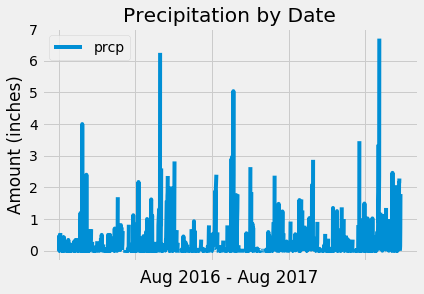

In [94]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_lastyear.plot()
plt.title("Precipitation by Date")
plt.xlabel("Aug 2016 - Aug 2017")
plt.ylabel("Amount (inches)")

In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_lastyear.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [96]:
# Design a query to show how many stations are available in this dataset?
cur.execute("SELECT distinct station from measurement where date >= '2016-08-23'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00519523',)
('USC00519281',)
('USC00516128',)


In [97]:
# how many stations are available in this dataset?
print(len(rows))

7


In [98]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
cur.execute("SELECT station, count(station) from measurement group by station order by 2 desc")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [99]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# USC00519281
cur.execute("SELECT min(tobs),max(tobs),avg(tobs) from measurement where station = 'USC00519281'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(54.0, 85.0, 71.66378066378067)


In [100]:
# Make new dataframe, filter on highest activity
precip_high_station = pd.read_sql("SELECT * from measurement where date >= '2016-08-23'order by date desc, prcp asc", conn)
precip_high_station.head()

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0


In [101]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# USC00519281, we know from earlier
precip_high_station = precip_high_station[precip_high_station["station"] == "USC00519281"]
precip_high_station.head()

,id,station,date,prcp,tobs
21,14959,USC00519281,2017-08-18,0.06,79.0
23,14958,USC00519281,2017-08-17,0.01,76.0
28,14957,USC00519281,2017-08-16,0.12,76.0
33,14956,USC00519281,2017-08-15,0.32,77.0
36,14955,USC00519281,2017-08-14,0.00,77.0


In [102]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
np.histogram(precip_high_station["tobs"],bins=12)

(array([ 5,  7,  7, 12, 27, 41, 40, 57, 66, 53, 29,  8], dtype=int64),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]))

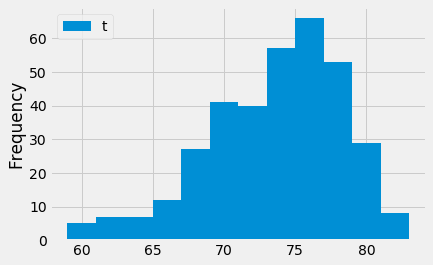

In [103]:
plt.hist(precip_high_station["tobs"],bins=12)
plt.ylabel("Frequency")
plt.legend("tobs",loc='upper left')
plt.show()

![precipitation](Images/station-histogram.png)

In [104]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [105]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps("2016-08-23","2017-08-23"))

[(58.0, 74.59058295964125, 87.0)]


In [109]:
# Better temps during June
print(calc_temps("2017-06-10","2017-06-18"))

[(72.0, 76.84482758620689, 83.0)]


In [111]:
print(type(calc_temps("2017-06-10","2017-06-18")))

<class 'list'>


In [116]:
avg_temp = []
avg_temp = calc_temps("2017-06-10","2017-06-18")
avg_temp = avg_temp[0][1]
print(avg_temp)

76.84482758620689


In [21]:
cur.execute("SELECT * from measurement where date >= '2016-08-23' and date <=  '2017-08-23' limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(2364, 'USC00519397', '2016-08-23', 0.0, 81.0)
(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2371, 'USC00519397', '2016-08-30', 0.0, 79.0)
(2372, 'USC00519397', '2016-08-31', 0.13, 80.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)


In [ ]:
# Flask App
# Create an app

@app.route("/api/v1.0/passengers")
def passengers():
    """Return a list of passenger data including the name, age, and sex of each passenger"""
    # Query all passengers
    results = session.query(Passenger.name, Passenger.age, Passenger.sex).all()

    # Create a dictionary from the row data and append to a list of all_passengers
    all_passengers = []
    for name, age, sex in results:
        passenger_dict = {}
        passenger_dict["name"] = name
        passenger_dict["age"] = age
        passenger_dict["sex"] = sex
        all_passengers.append(passenger_dict)

    return jsonify(all_passengers)


app = Flask(__name__)


hello_dict = {"Hello": "World!"}


@app.route("/")
def home():
    return "Hi"


@app.route("/normal")
def normal():
    return hello_dict


@app.route("/jsonified")
def jsonified():
    return jsonify(hello_dict)

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/names<br/>"
        f"/api/v1.0/passengers"
    )


@app.route("/api/v1.0/names")
def names():
    """Return a list of all passenger names"""
    # Query all passengers
    results = session.query(Passenger.name).all()

    # Convert list of tuples into normal list
    all_names = list(np.ravel(results))

    return jsonify(all_names)






# Define static routes
@app.route("/")
def welcome():
    """Welcome to Precipitation Data (v2017)"""
        return (
        f"Available Routes:<br/>"
        f"/api/v1.0/names<br/>"
        f"/api/v1.0/passengers"
    ) 

@app.route("/precipitation")
def precipitation():
    precip_json = "Peleke"
    location = "Tien Shan"

    return f"My name is {name}, and I live in {location}."


@app.route("/contact")
def contact():
    email = "peleke@example.com"

    return f"Questions? Comments? Complaints? Shoot an email to {email}."


# 4. Define main behavior
if __name__ == "__main__":
    app.run(debug=True)

## Optional Challenge Assignment

In [118]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


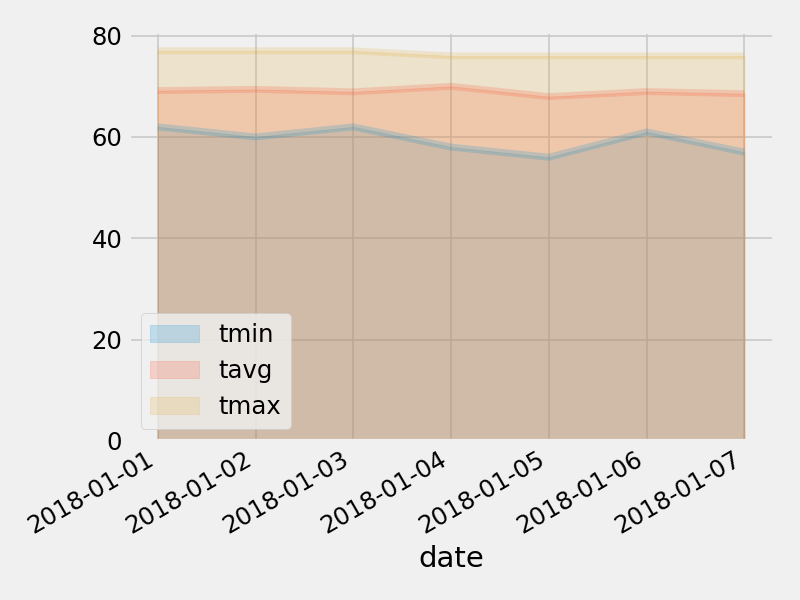

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
